# Implimentation of the 4. SPML Assignment
## Own Created Environment
inspired by Denny Britz Tutorial
## Table of Content
* Libraries
* Environment
* Value Iteration
    * Algorithm
    * Training V and Policy
    * Graphical Representation
    * Evaluation
    
    
* Q-Learning
    * Algorithm
    * Training Q-Values
    * Graphical Representation
    * Evaluation

If you do not have the PIL library and the graphics library remove the hashtags and run the cell below

In [1]:
#!pip install http://bit.ly/csc161graphics
#!pipenv install PIL

## Libraries

In [1]:
import numpy as np    # Linear Algebra
from gridworld import GridworldEnv # provided from Denny Britz and modified
from graphicsLib import GridDisp   # Graphical Interface self programmed
import random         # Random values
import time           # Timesteps
%matplotlib inline
import matplotlib.pyplot as plt

## Environment

In [14]:
env = GridworldEnv(shape=[10, 10], obstacles=[(0,1),(1,1),(1,2), (2,3),(3,5),(6,3),(8,5),(3,9)])

Display Setup


In [3]:
env.nS

100

## Value Iteration

### Algorithm

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1600/1*MsD6og8hCReDO24T8iZfNw.png")

1. Initialize V(s) and V(s') to different arbitary values. Otherwise the while loop below would not execute
2. Initialize a policy arbitary where the row-size euqals the #states & the column-size equals the #actions
3. Repeat 4-9 till difference of V(s) and V(s') is smaller than some small specific amount
4. V(s) updates to be V(s')
5. Go through all states and in every state look which action are available 
6. Make a list where all the q-values for the possible state, action pairs will be put in
7. Put the q-values according to the bellman equations into the list created in step 4
8. Update V(s') to be the maximum value from the q-value list
9. One-hot-encoding the the action we take and reasing solution to policy array

#### The Bellman Equation

In [5]:
def bellman_equation(prob_nextState_reward_goal, gamma, V_old):
    prob = prob_nextState_reward_goal[0][0]
    nextState = prob_nextState_reward_goal[0][1]
    reward = prob_nextState_reward_goal[0][2]
    return reward + gamma*(prob*V_old[nextState])

### Training V and Policy

In [6]:
def value_iteration(env, theta=0.0001, discount_factor=1.0):
    # 1. Initialize V(s) and V(s') to different arbitary values
    V_new = np.zeros(env.nS)
    V_old = np.ones(env.nS)
    # 2. Initialize a policy arbitary where the row-size euqals the #states 
    # & the column-size equals the #actions
    policy = np.zeros([env.nS, env.nA])
    
    # 3. Repeat 4-7 till difference of V(s) and V(s') is smaller
    # than some small specific amount
    while np.any(np.abs(V_new-V_old) > theta):
        # 4. V(s) updates to be V(s')
        V_old = np.copy(V_new)
        # 5. Go through all states and in every state look 
        # which action are available 
        for state in env.states:
            # 6. Make a list where all the q-values for 
            # the possible actions are put in
            q_s_a = []   # Q(state, action)
            for action in range(env.nA):
                # 7. Put the q-values according to the bellman 
                # equations into the list created in step 4
                prob_nextState_reward_goal = env.P[state][action]
                q_s_a.append( bellman_equation(prob_nextState_reward_goal, discount_factor, V_old) )
            # 8. Update V(s') to be the maximum value from the q-value list
            V_new[state] = max(q_s_a)
            # 9. One-hot-encoding the the action we take and 
            # reasing solution to policy array
            policy[state]=0
            policy[state, np.argmax(q_s_a)] = 1
    return policy, V_new

In [7]:
policy, V = value_iteration(env)

In [8]:
policy.shape

(100, 4)

In [9]:
val = V.reshape(10, 10)

In [10]:
val

array([[ 0. , -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9],
       [ 0. ,  0. , -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. ],
       [-1.2,  0. , -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. , -1.1],
       [-1.1, -1. ,  0. , -0.6, -0.7, -0.8,  0. , -1. , -1.1, -1.2],
       [-1. , -0.9, -0.8, -0.7, -0.8, -0.9, -1. , -1.1, -1.2, -1.3],
       [-1.1, -1. , -0.9,  0. , -0.9, -1. , -1.1, -1.2,  0. , -1.4],
       [-1.2, -1.1, -1. , -1.1, -1. , -1.1, -1.2, -1.3, -1.4, -1.5],
       [-1.3, -1.2, -1.1, -1.2, -1.1, -1.2, -1.3, -1.4, -1.5, -1.6],
       [-1.4, -1.3, -1.2, -1.3, -1.2, -1.3, -1.4, -1.5, -1.6, -1.7],
       [-1.5, -1.4, -1.3,  0. , -1.3, -1.4, -1.5, -1.6, -1.7, -1.8]])

In [26]:
policy.shape
p = []
actionsD = {0:'u', 1:'r', 2:'d', 3:'l'}
for i in policy:
    p.append(actionsD[np.argmax(i)])
pAsNp= np.asarray(p)
pAsNp.reshape(env.shape)

array([['u', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l'],
       ['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u'],
       ['d', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u'],
       ['r', 'd', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u'],
       ['r', 'r', 'r', 'u', 'u', 'u', 'l', 'u', 'u', 'u'],
       ['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u'],
       ['u', 'u', 'u', 'r', 'u', 'u', 'u', 'u', 'l', 'u'],
       ['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u'],
       ['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u'],
       ['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']], dtype='<U1')

### Graphical Representation

In [15]:
env._render(values=val)

In [13]:
#env.close()

### Evaluation

In [16]:
worlds = {1:{'shape':[10,10],
             'obstacles': [(0,1),(1,1),(1,2), (2,3),(3,5),(6,3),(8,5),(3,9),(4,4)],
             'goals':[(0,0)]
            }
         ,
          2:{'shape':[12,12],
             'obstacles': [(0,1),(1,1),(1,2),(5,4),(5,6),(3,5),(6,3),(8,5),(3,9),(4,4), (11,11)],
             'goals':[(5,5)]
            }
          ,
          3:{'shape':[5,5],
             'obstacles': [(2,2)],
             'goals':[(2,1)]
            }
         }

In [17]:
testCases = [
     (1,1,-0.1,1,1),
     (2,1,0,1,1),
     (3,1,-0.1,1,1),
     (4,1,-1,0.9,1),
     (5,1,-1,0.1,1),
     (6,2,-1,1,1),
     (7,3,-1,1,1),
     (8,1,-1,1,0.5),
     (9,1,-1,1,0.25),
]

In [18]:
def testEnv(case):
    trialNum, worldNum, sp, df, tp = case
    world = worlds[worldNum]
    env = GridworldEnv(shape=world['shape'], obstacles=world['obstacles'], goals=world['goals'], statePen=sp, transProb=tp, title=str(trialNum) + "w"+str(case))
    policy, V = value_iteration(env,discount_factor=df)
    val = V.reshape(world['shape'][1], world['shape'][0])
    env._render(values=val,valIt=True)
    time.sleep(3)
    env.close()

In [19]:
def test(cases):
    for c in cases:
        testEnv(c)
        print("done", c)

In [20]:
test(testCases)

Display Setup
done (1, 1, -0.1, 1, 1)
Display Setup
done (2, 1, 0, 1, 1)
Display Setup
done (3, 1, -0.1, 1, 1)
Display Setup
done (4, 1, -1, 0.9, 1)
Display Setup
done (5, 1, -1, 0.1, 1)
Display Setup
done (6, 2, -1, 1, 1)
Display Setup
done (7, 3, -1, 1, 1)
Display Setup
done (8, 1, -1, 1, 0.5)
Display Setup
done (9, 1, -1, 1, 0.25)


## Q-Learning
### Algorithm

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1600/1*_CRZzhrq1KDI2yKYq5AREg.png")

1. Initialize Q-Table
    * random
    * or all zeros
    * or domain knowledge initialization
2. Explore vs Exploit Action
    * select an action for current state s
3. Execute selected Action -> Go to s'
4. Selcet Action in s'
    * action with highest q-value
5. Update Q-Table according to the Bellman Equations
    * $Q({\small state}, {\small action}) \leftarrow (1 - \alpha) Q({\small state}, {\small action}) + \alpha \Big({\small reward} + \gamma \max_{a} Q({\small next \ state}, {\small all \ actions})\Big)$
6. Update the Current State to be the Next State
7. If Goal-State -> New Episode

### Training Q-Values

In [28]:
# 1. Initialize Q-Table
q_table = np.zeros([100, 4]) #100 states & 4 action per state

In [34]:
# Rewards for Accumulated Reward Graph
rewards = {}

In [35]:
q_table = np.zeros([100, 4])
def q_learning(env, q_table, epsilon=0.1, alpha=0.1, gamma=0.6):
    for episode in range(1, 101):
        state = env.reset()
        done = False
        acc=0
        if episode%10 == 0:
            rewards[episode]=([],[])
        i=0
        # 7. If Goal-State -> New Episode
        while not done:
            # 2. Explore vs Exploit Action
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)
            else:
                action = np.argmax(q_table[state])
            
            # 3. Execute selected action -> Go to s'
            next_state, reward, done, info = env.stepQ(action)
            
            if episode%10 == 0:
                acc += reward
                i+=1
                rewards[episode][1].append(acc)
                rewards[episode][0].append(i)
            
            # 4. Update Q-Table according to the Bellman Equations
            max_next_action = np.max(q_table[next_state])
            q_table[state][action] = q_table[state][action] + alpha*(reward + gamma*max_next_action-q_table[state][action])
            # OR 
            # q_table[state][action] = (1-alpha)*q_table[state][action] + alpha*(reward+gamma*max_next_action)
            #print(q_table[state])
            # Update the Current State to be the Next State
            state = next_state
            #env._render(values=val)
            #time.sleep(0.01)
        
        if episode%100 == 0:
            print(str(episode) + ' Episode')

In [36]:
q_learning(env, q_table)

100 Episode


### Graphical Representation

In [ ]:
for i in range(30):
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, done, info = env.stepQ(action)
        env._render(values=val)
        state = next_state
env.close()

### Evaluation

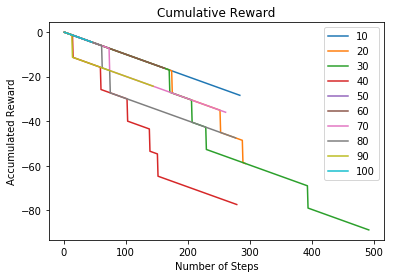

In [37]:
for k in rewards:
    plt.plot(rewards[k][0],rewards[k][1],label=str(k))
plt.legend()
plt.title("Cumulative Reward")
plt.xlabel("Number of Steps")
plt.ylabel("Accumulated Reward")
plt.savefig('accuRew')
plt.show()